In [5]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

import cdf

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-tracked-rsq-and-IPR
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\biax-tracked-rsq-and-IPR
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
tracked_measurements = []

for measurement in all_biax_measurements:
    _, name = os.path.split(measurement['path'])
    
    trackdata = glob.glob('u:/particle track data/%s.npz' % name)
    if not trackdata:
        continue
    
    measurement['trackdata'] = trackdata[0]
    tracked_measurements.append(measurement)

# voor deze set:
zeroB = 755.5
zeroCD = 947.4
px_per_tick = 0.0008251
x0 = 147
y0 = 913

mm_per_px = 4.95e-5 / px_per_tick
print mm_per_px

0.0599927281542


\includegraphics{notebooks/biax-tracked-rsq-and-IPR/CDF-rij-2.pdf}
\includegraphics{notebooks/biax-tracked-rsq-and-IPR/CDF-rij-3.pdf}
\includegraphics{notebooks/biax-tracked-rsq-and-IPR/CDF-rij-1.pdf}
\includegraphics{notebooks/biax-tracked-rsq-and-IPR/CDF-rij-4.pdf}


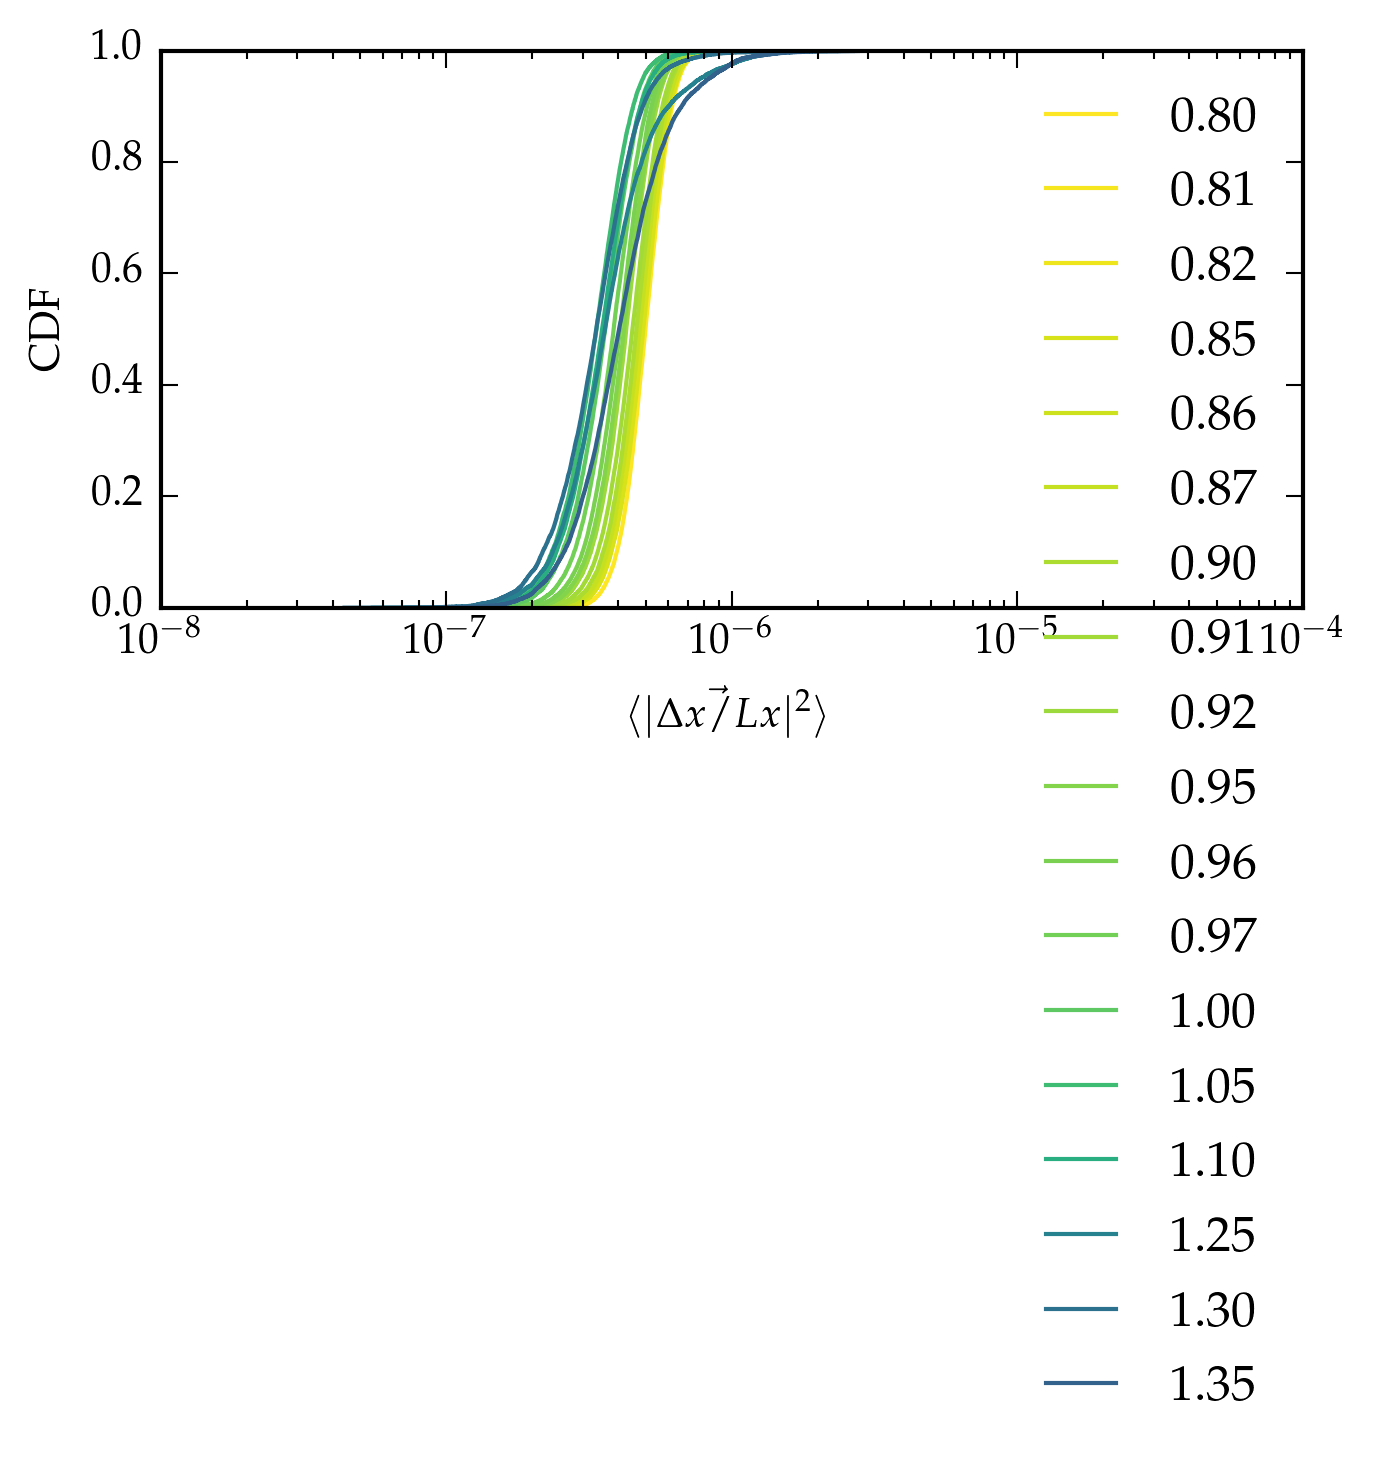

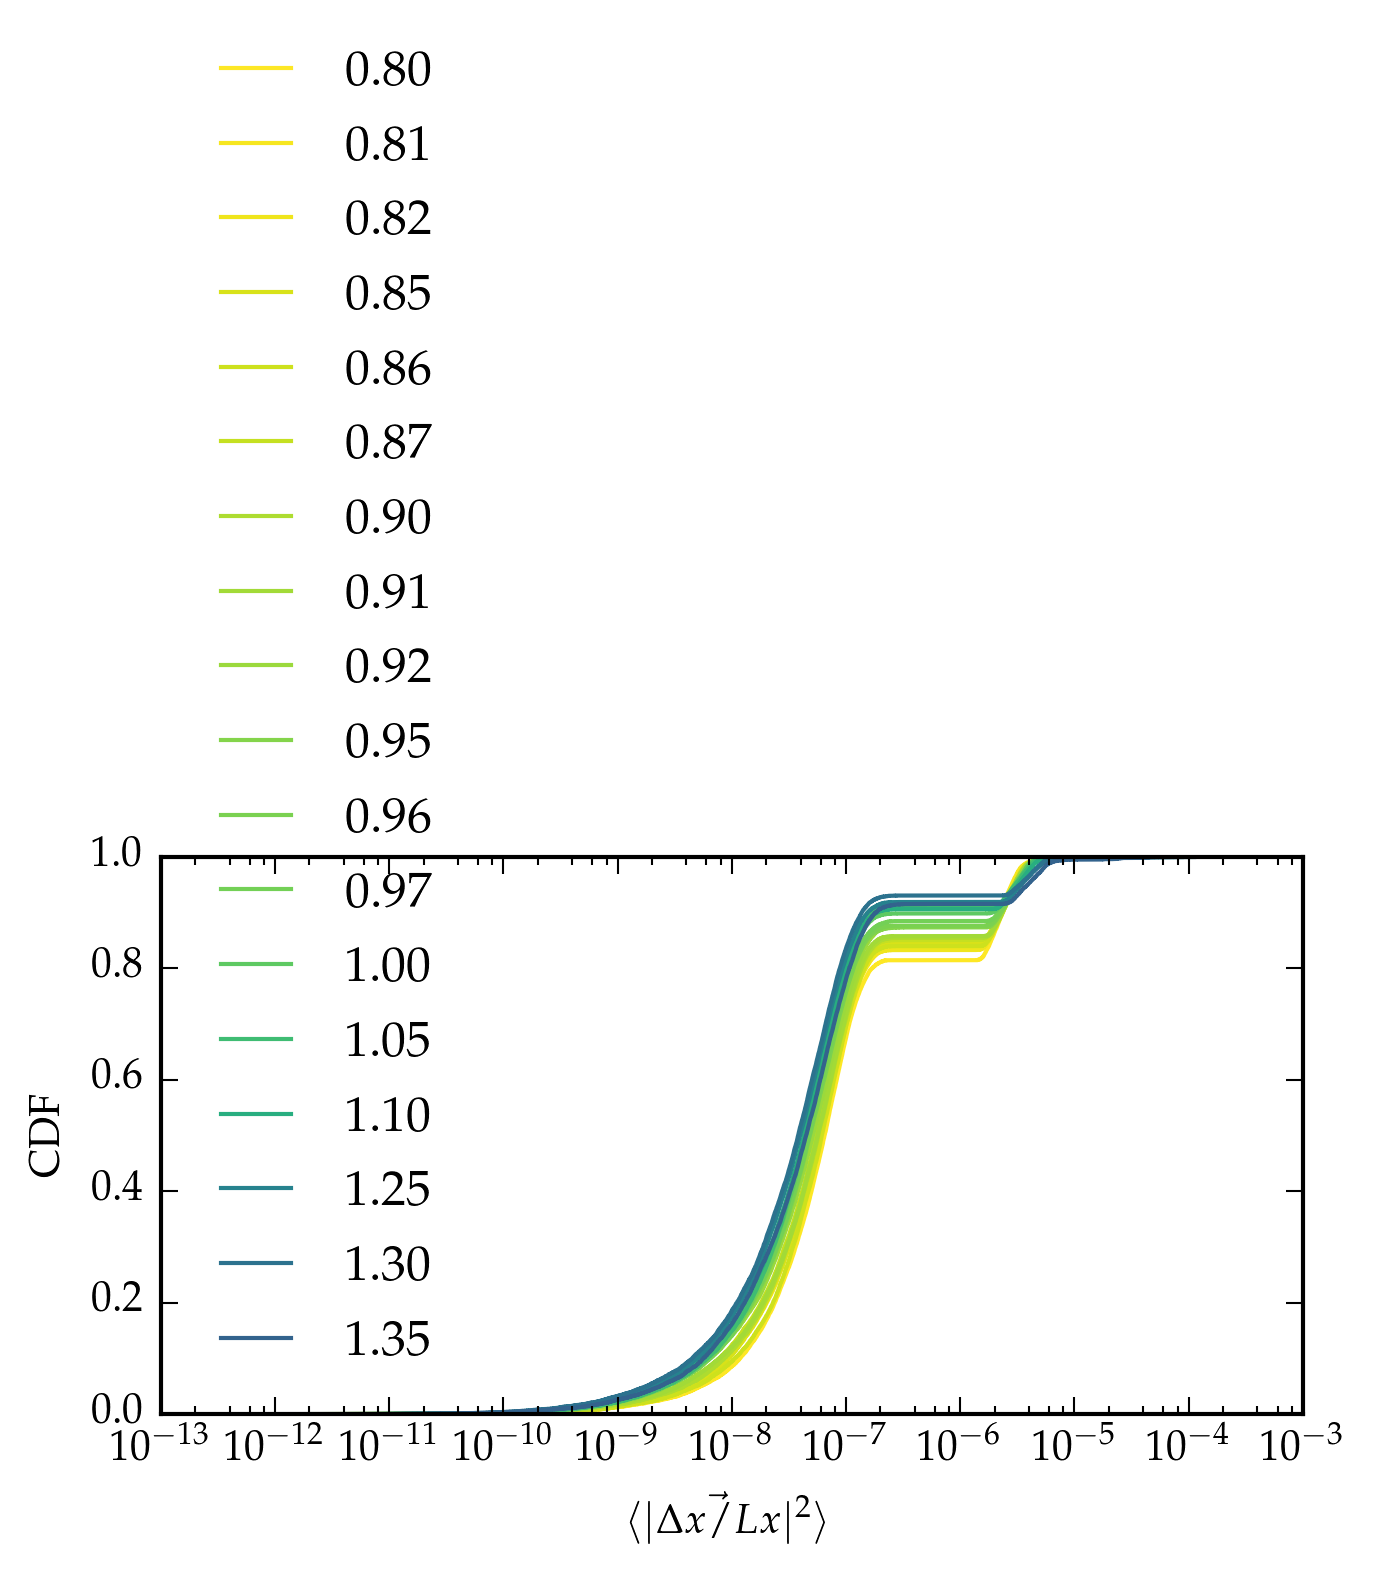

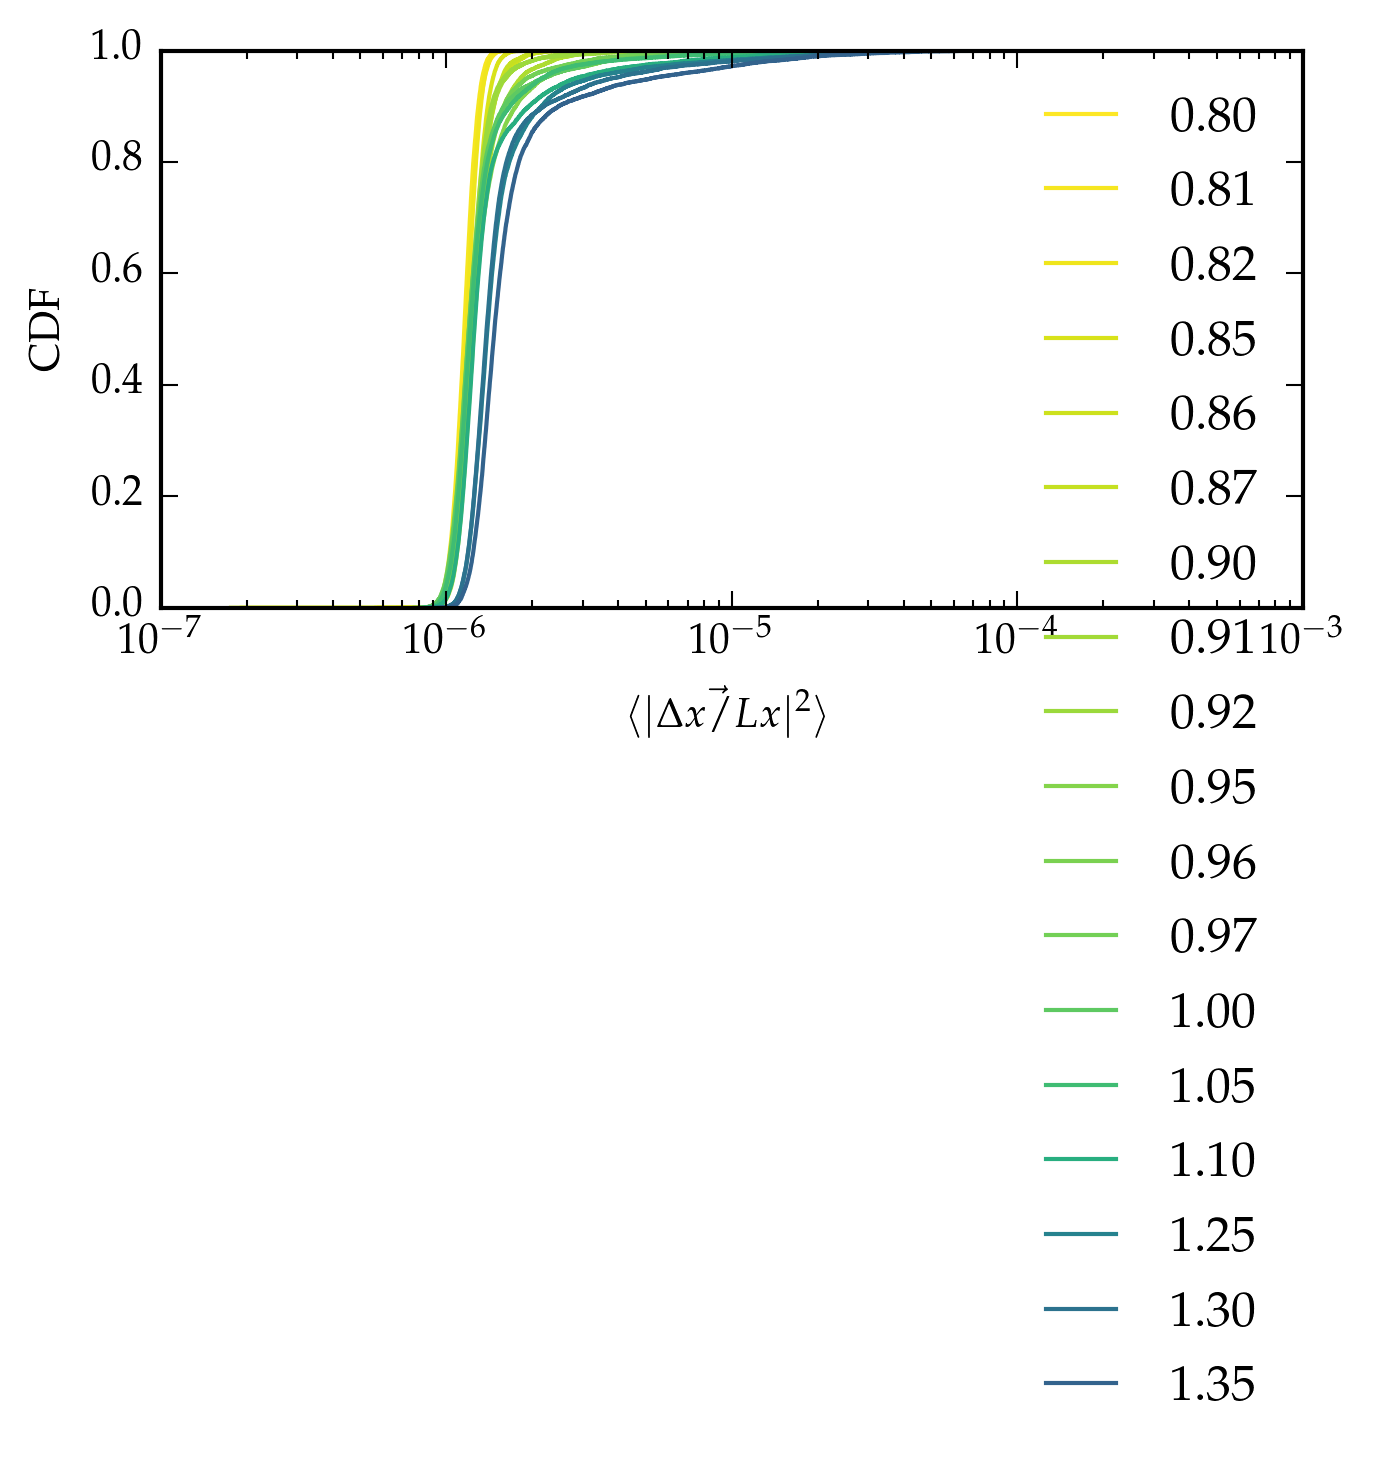

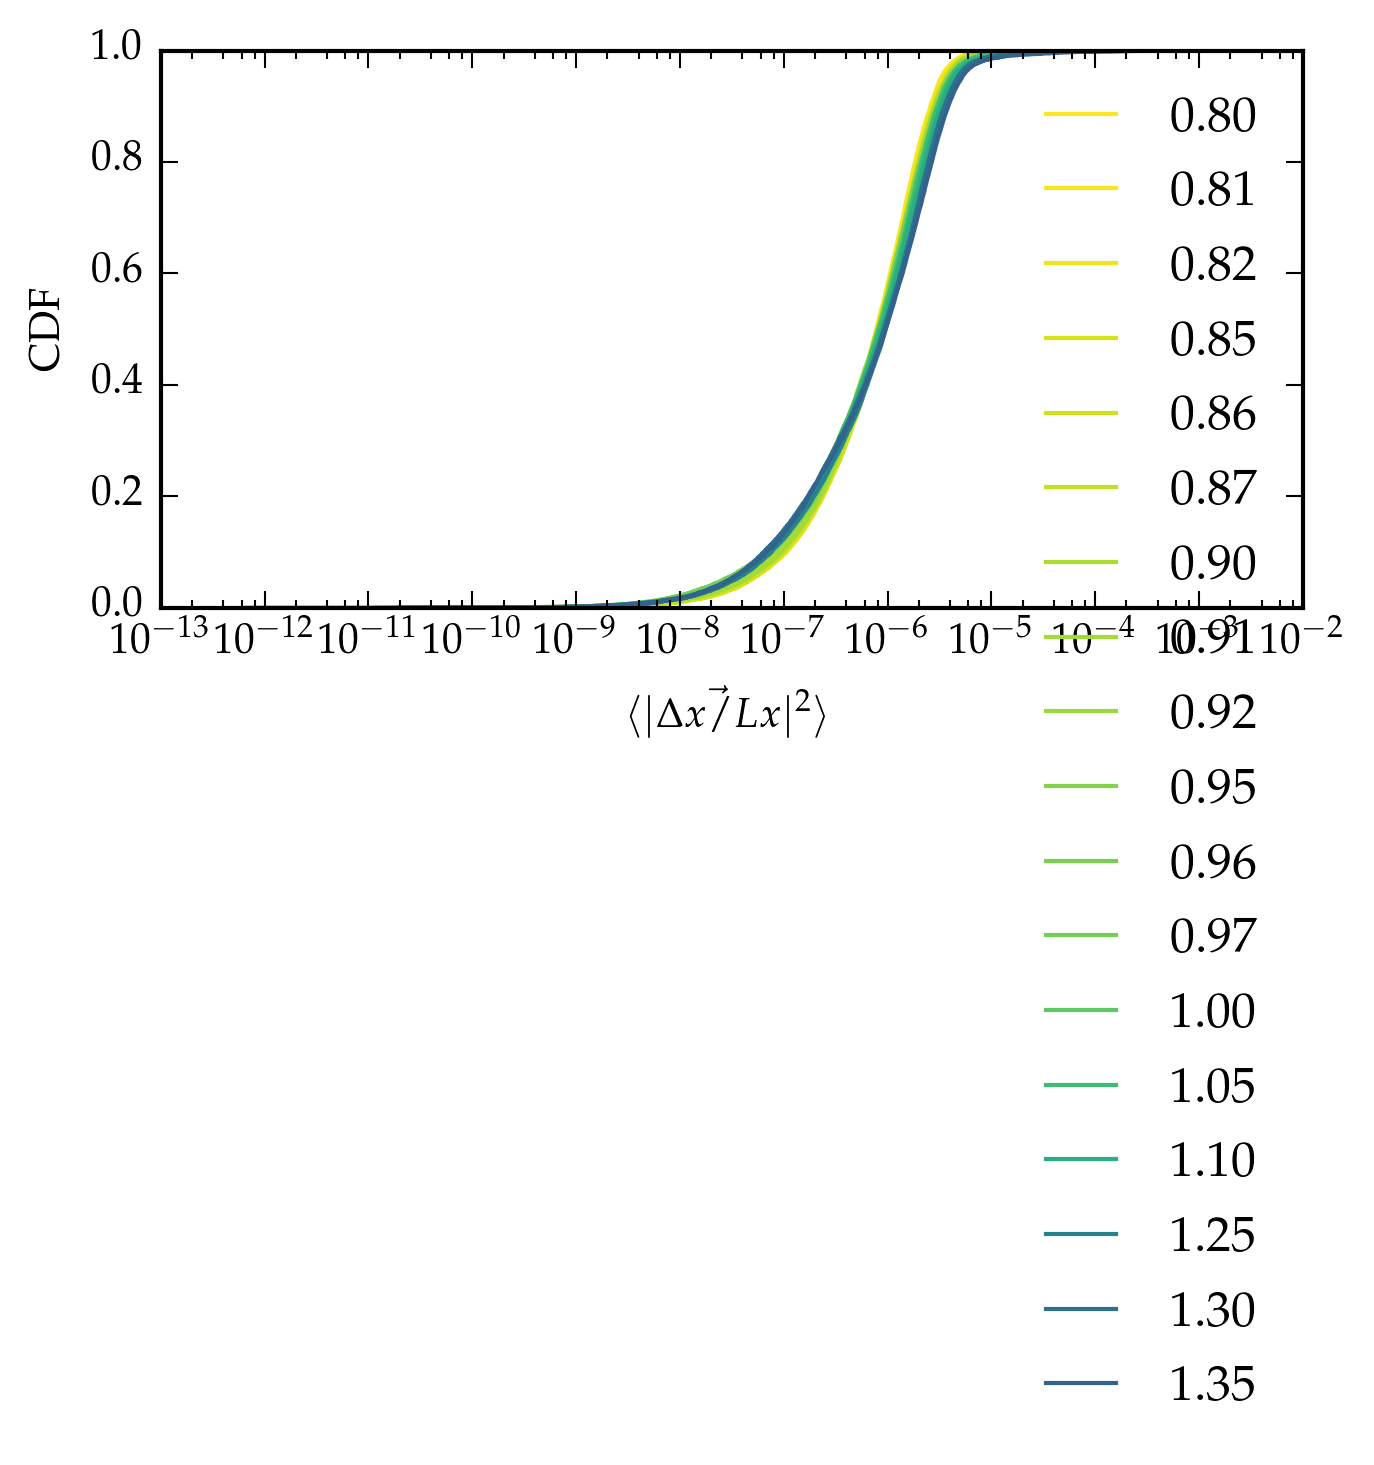

In [48]:
import collections
figs = collections.defaultdict(lambda: max(figs.values() + [0]) + 1)


cmap = get_cmap('viridis_r')
norm = phi_norm

for j,dt in enumerate([1,10]):
    for i,measurement in enumerate(sorted(tracked_measurements, key=lambda x: x['phi'])):
        if measurement['shear_rate'] > 1e-4:
            continue
        base, naam = os.path.split(measurement['path'])
        phi = measurement['phi']
        position_csv = np.loadtxt(base + "/" + naam + "/position.csv")

        try:
            particle_data = np.load(r"U:/Particle track data/" + naam + ".npz")
        except Exception as e:
            print naam, e
            continue

        X = particle_data["X"]
        Y = particle_data["Y"]
        r = particle_data["r"]

        Bticks = position_csv[:,2]
        CDticks = position_csv[:,3]

        Bpos = zeroB + Bticks*px_per_tick
        CDpos = zeroCD + CDticks*px_per_tick

        X = (X-x0) / CDpos[:,np.newaxis]
        Y = (y0-Y) / Bpos[:,np.newaxis]

        dx = X[:-dt] - X[dt:]
        dy = Y[:-dt] - Y[dt:]

        plt.figure(figs[j,0])
        cdf.plot_cdf(np.nanmean(dx**2 + dy**2, axis=1),
                     label="%.2f" % (measurement['phi']),
                     color=cmap(norm(phi)))
        
        
        ds = (dx**2 + dy**2)
        ds = ds[np.isfinite(ds)]
        
        plt.figure(figs[j,1])
        cdf.plot_cdf(ds[::100],
                     label="%.2f" % (measurement['phi'],),
                     color=cmap(norm(phi)))


for fid in figs.values():
    plt.figure(fid)
    plt.legend(loc='best', frameon=False)
    plt.semilogx()
    #plt.axis(ymin=3e-7, ymax=1e-1)
    plt.xlabel(r"$\langle |\vec{\Delta x / Lx}|^2 \rangle$")
    plt.ylabel("CDF")
    savefig('CDF-rij-%i.pdf' % fid)
    
figs = [plt.figure(fid) for fid in figs.values()]

0.800007238644
0.81000680307
0.82000872345
0.849989482978
0.85998767802
0.869989657658
0.899986061658
0.909983557932
0.919984612672
0.9499848333
0.959989772811
0.969988276006
0.99998547011
1.04998076996
1.09997952716
1.24997963634
1.29997372331
1.34997217456
\includegraphics{notebooks/biax-tracked-rsq-and-IPR/IPR-dt-10s.pdf}


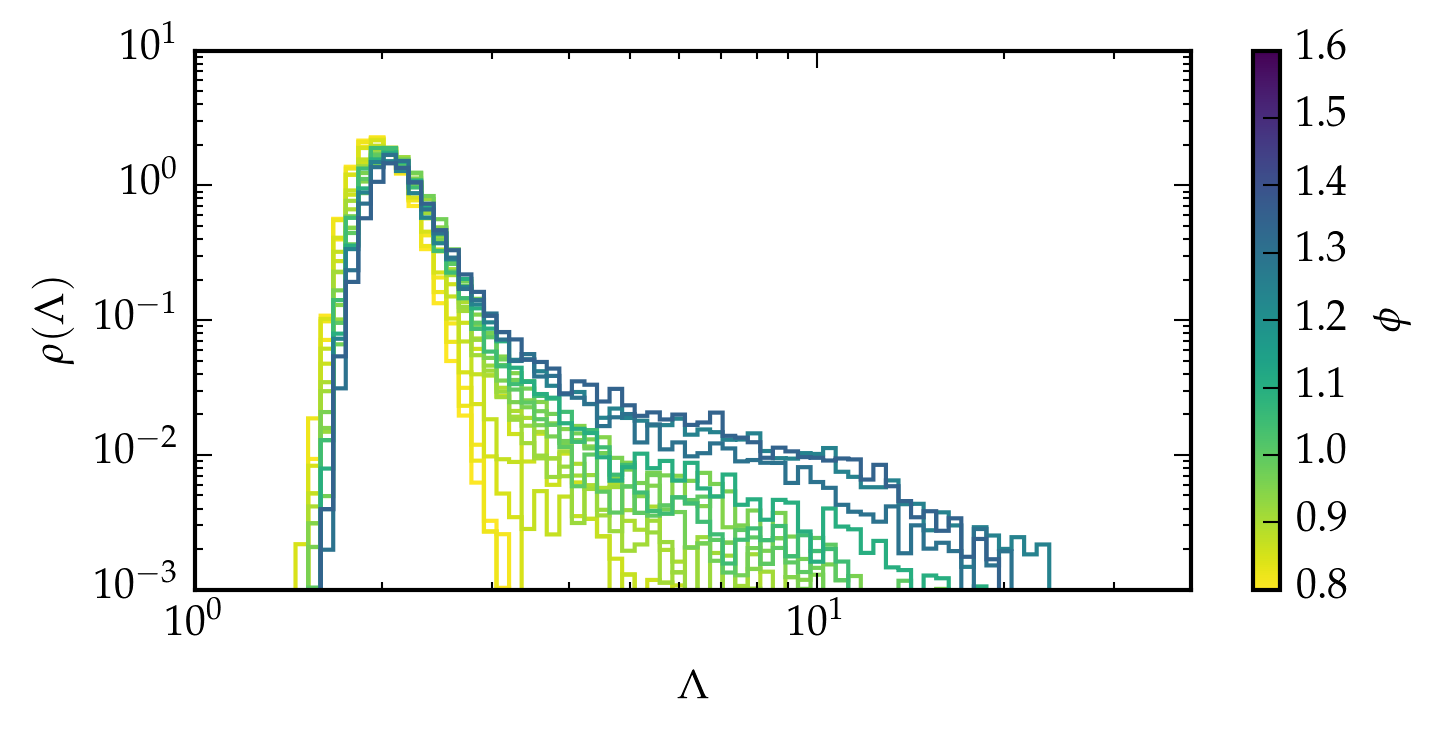

In [14]:
ms = [tracked_measurements[2], tracked_measurements[11]]

bins = np.logspace(0,2,100)

cmap = get_cmap('viridis_r')
norm = phi_norm

figs = []

for j,dt in enumerate([10]):
    figs.append(fullfig())
    
    for i,measurement in enumerate(sorted(tracked_measurements, key=lambda x: x['phi'])):
        if measurement['shear_rate'] > 1e-4:
            continue
        base, naam = os.path.split(measurement['path'])
        phi = measurement['phi']
        position_csv = np.loadtxt(base + "/" + naam + "/position.csv")

        try:
            particle_data = np.load(r"U:/Particle track data/" + naam + ".npz")
        except Exception as e:
            print naam, e
            continue

        X = particle_data["X"]
        Y = particle_data["Y"]
        r = particle_data["r"]

        Bticks = position_csv[:,2]
        CDticks = position_csv[:,3]

        Bpos = zeroB + Bticks*px_per_tick
        CDpos = zeroCD + CDticks*px_per_tick

        X = (X-x0) / CDpos[:,np.newaxis]
        Y = (y0-Y) / Bpos[:,np.newaxis]

        dx = X[:-dt] - X[dt:]
        dy = Y[:-dt] - Y[dt:]

        IPRvt = np.nanmean((dx**2 + dy**2)**2, axis=1)/np.nanmean(dx**2 + dy**2, axis=1)**2
        varvt = np.nanmean(dx**2 + dy**2, axis=1)
        
        plt.hist(IPRvt,
                 bins=bins,
                 histtype='step',
                 label=naam.split("~")[0],
                 normed=True,
                 log=True,
                 color=phi_cmap(phi_norm(phi)),
        )
        
        print phi

    #plt.legend(loc='best', frameon=False)
    plt.scatter([-100], [-100], c=[0], cmap=phi_cmap, norm=phi_norm)
    plt.loglog()
    #plt.axis(ymin=3e-7, ymax=1e-1)
    plt.axis(ymin=1e-3, xmax=40, xmin=1)
    plt.xlabel(r"$\Lambda$")
    plt.ylabel(r"$\rho(\Lambda)$")
    cb = plt.colorbar()
    cb.set_ticks(np.arange(0.8,1.61,0.1))
    cb.set_label(r'$\phi$')
    savefig('IPR-dt-%is.pdf' % dt)